# Модель машиннго обучения - DecisionTreeRegressor()!!!

In [1]:
# загружаем библиотеки
import pandas as pd # работа с данными / python data analysis library
import numpy as np # работа с числовыми данными / python numerical computing library
import seaborn as sns # визуализация данных / python data visualization library
import matplotlib.pyplot as plt # визуализация данных / python data visualization library

from sklearn.tree import DecisionTreeRegressor # регрессор дерева решений

from sklearn.metrics import mean_absolute_error # метрика средняя абсолютная ошибка / mean absolute error
from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка / mean squared error
from sklearn.metrics import mean_absolute_percentage_error # метрика средняя абсолютная процентная ошибка / mean absolute percentage error

from sklearn.model_selection import train_test_split # разделение выборки на обучающую и тестовую / train_test_split
from sklearn.feature_selection import SelectKBest, f_regression # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  
from sklearn.preprocessing import MinMaxScaler # алгоритм стандартизации данных / MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV # подбор гиперпараметров

from joblib import dump, load # сохранение и загрузка модели 

from hyperopt import fmin, space_eval, tpe, hp, STATUS_OK, Trials # подбор гиперпараметров

import optuna # подбор гиперпараметров
optuna.logging.set_verbosity(optuna.logging.WARNING) # отключаем вывод промежуточных итогов вычислений

# отключаем предупреждения
import warnings 
warnings.filterwarnings("ignore")

# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 369


Тренировочная выборка:
     RMSE: 0.06
     MAE: 0.01
     MAPE: 0.04%
Валидационная выборка:
     RMSE: 0.48
     MAE: 0.28
     MAPE: 2.19%
Тестовая выборка:
     RMSE: 0.48
     MAE: 0.27
     MAPE: 2.18%



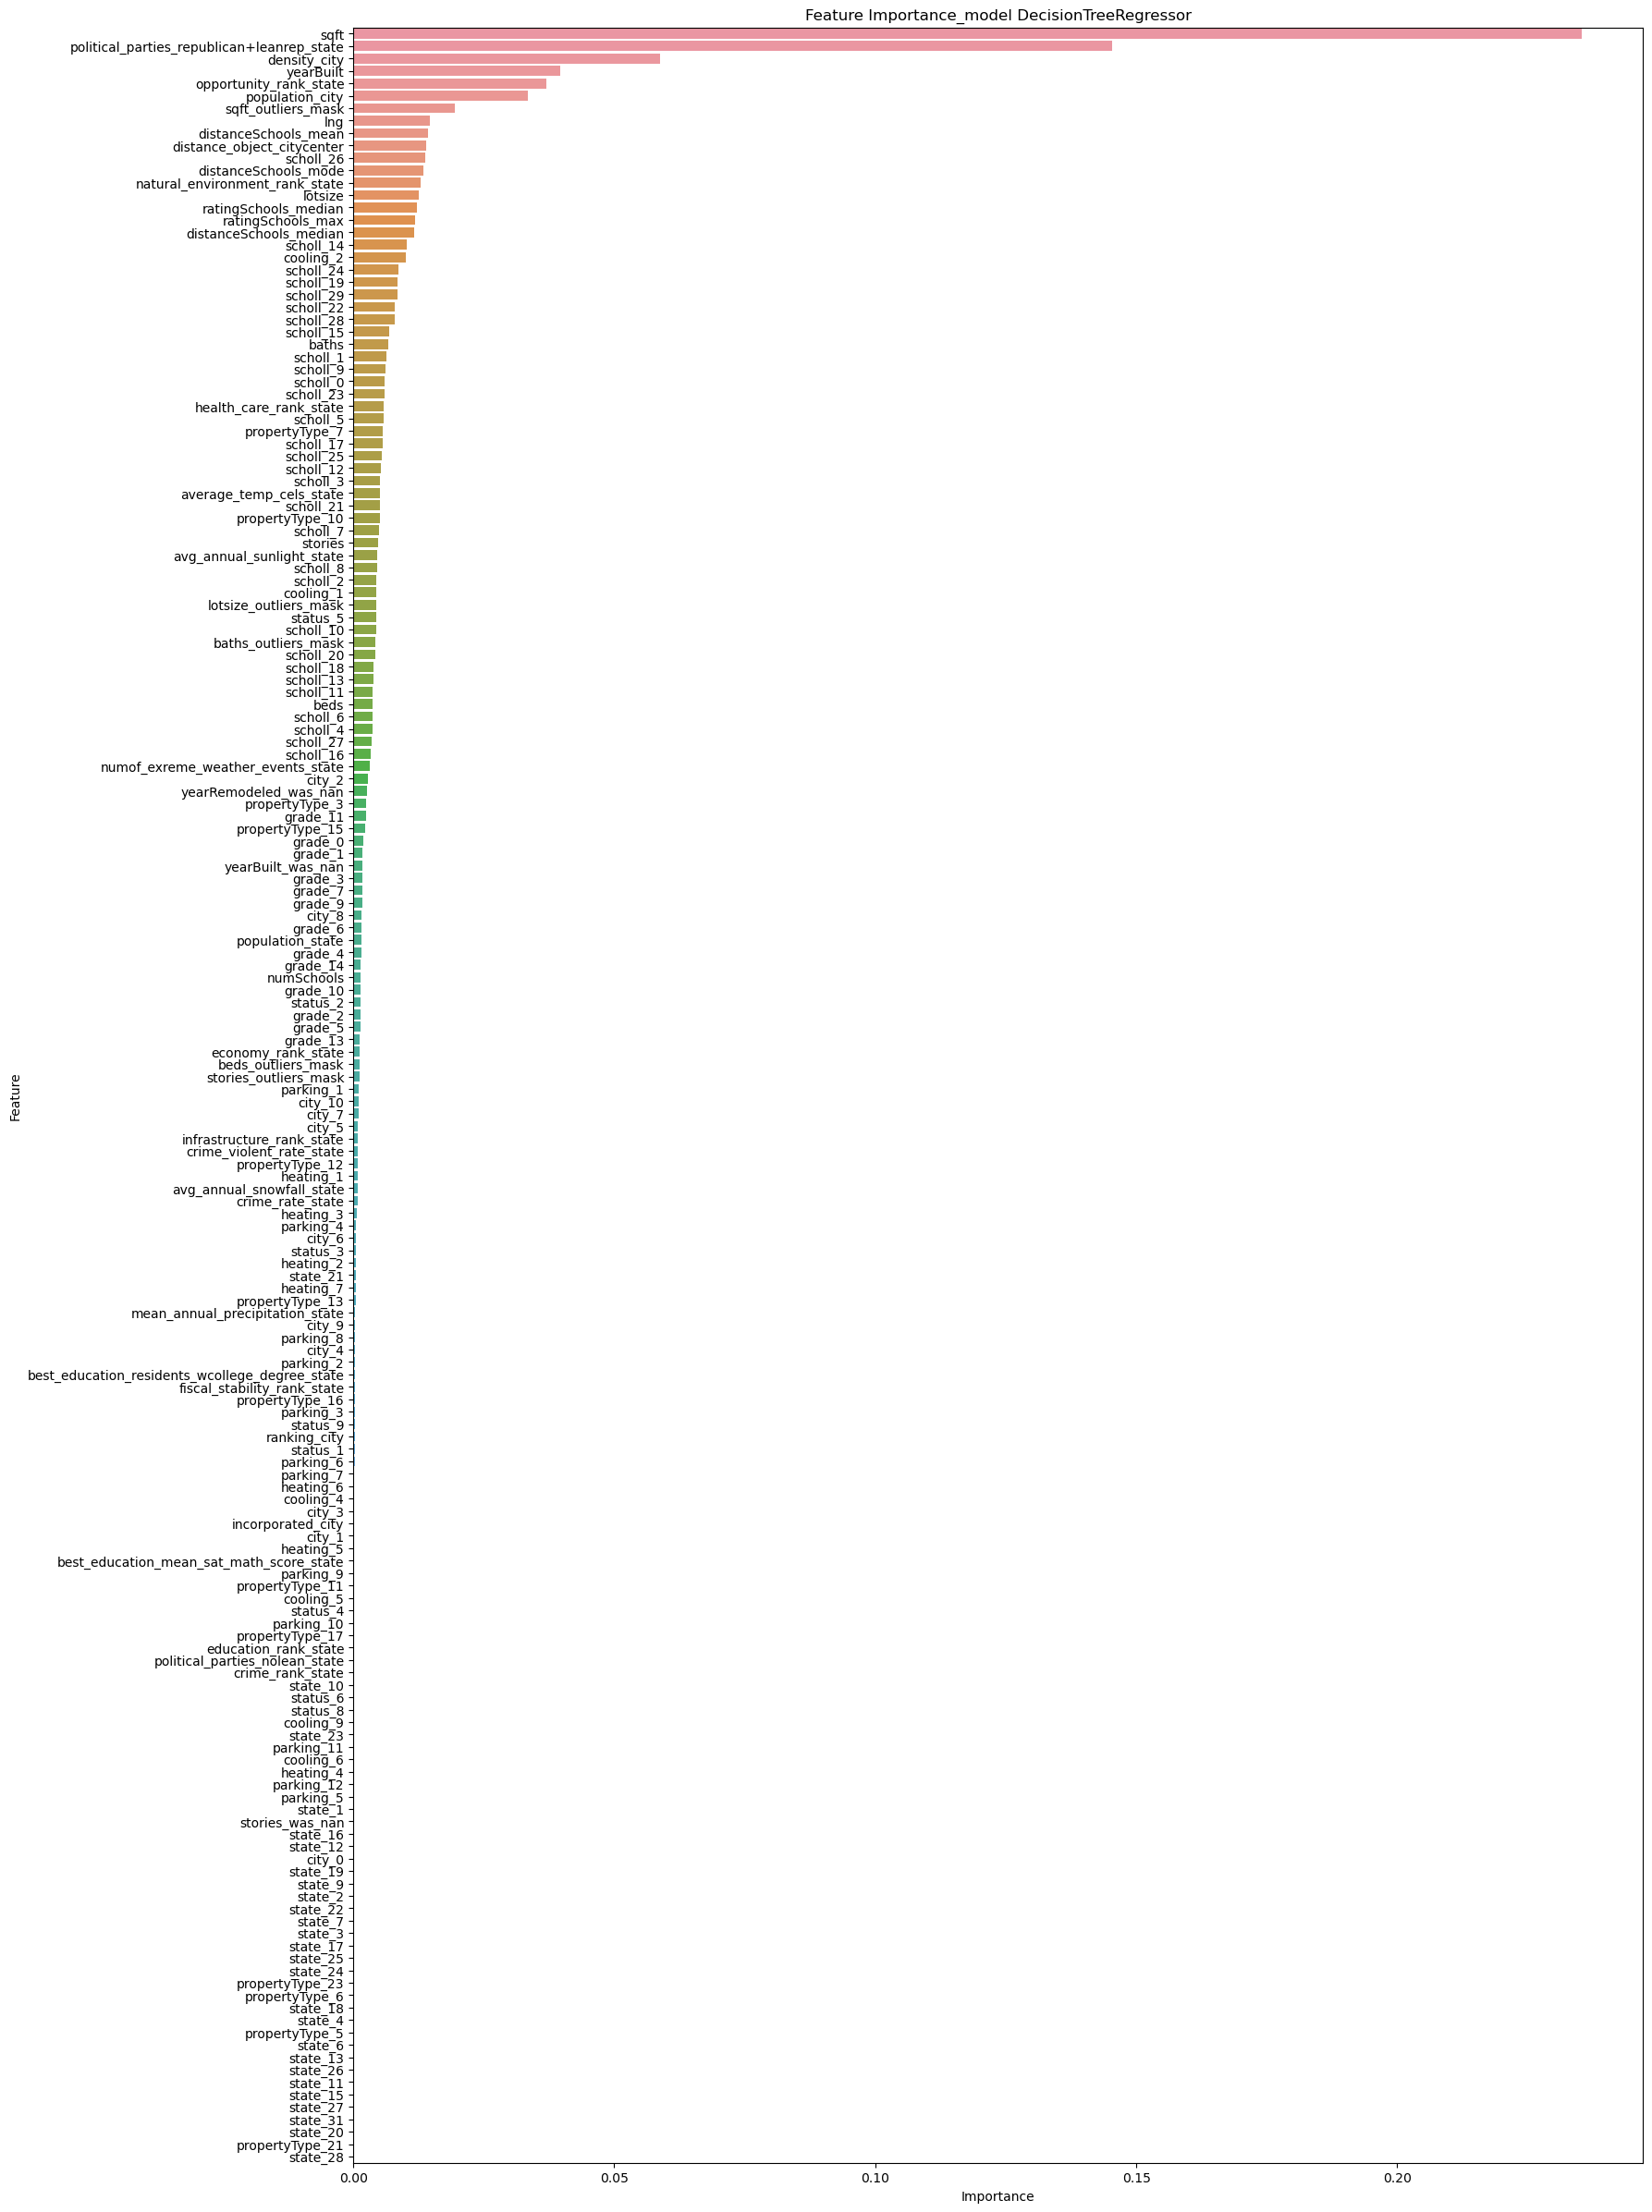

CPU times: user 28.7 s, sys: 1.53 s, total: 30.2 s
Wall time: 30.7 s


In [2]:
%%time
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 369

# загружаем данный
data_dtr = pd.read_csv("data/data_final.csv", sep=",")

# создаем матрицу наблюдений и вектор правильных ответов
X = data_dtr.drop(columns="target", axis=1)
y = data_dtr["target"]

# производим разделение выборки на тренировочную, валидационную и тестовую
X_train, X_validtest, y_train, y_validtest = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_validtest, y_validtest, test_size=0.5, random_state=RANDOM_SEED)

# #производим отбор наиболее важных признаков
# selector = SelectKBest(score_func=f_regression, k=100)
# selector.fit(X_train, y_train)
# best_features = selector.get_feature_names_out()
# X_train = X_train[best_features]
# X_valid = X_valid[best_features]
# X_test = X_test[best_features]

# формируем лист признаков для графика
feature_names = X_train.columns

# производим нормализацию данных
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# строим и обучаем модель
model_dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)

# обучаем модель
model_dtr.fit(X_train, y_train)
# формируем предсказания
y_train_predict_dtr = model_dtr.predict(X_train)
y_valid_predict_dtr = model_dtr.predict(X_valid)
y_test_predict_dtr = model_dtr.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_dtr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_dtr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_dtr)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_dtr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_dtr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_dtr)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_dtr))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_dtr)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_dtr)*100))
print()

# выводим график важности признаков
feature_importance = model_dtr.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(18, 30))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance_model DecisionTreeRegressor")
plt.show()

In [3]:
# выводим параметры модели
print(f"Параметры модели DecisionTreeRegressor: {model_dtr.get_params()}.")

Параметры модели DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 369, 'splitter': 'best'}.


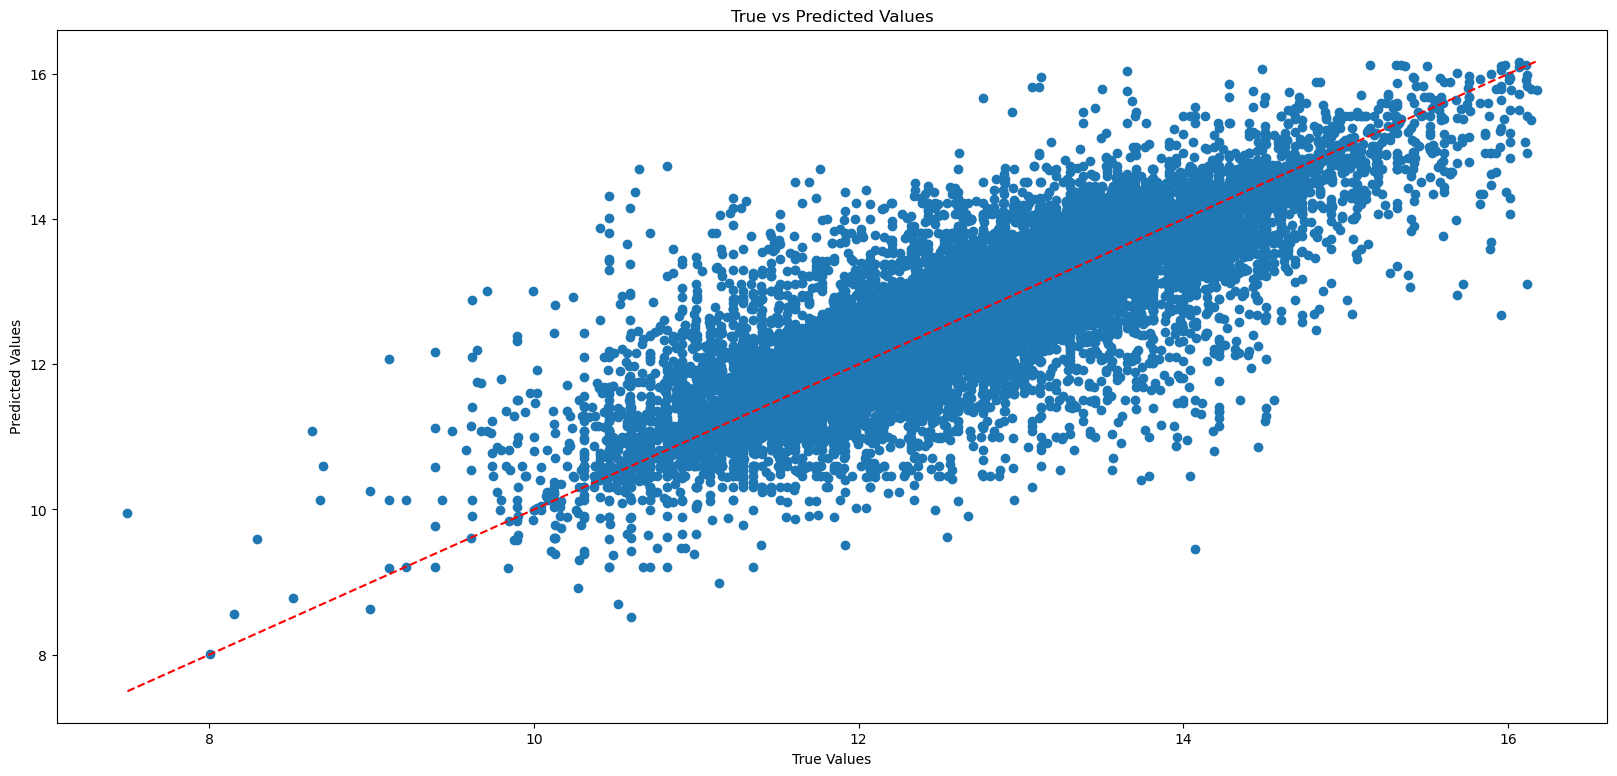

In [4]:
# график предсказанных значений против истинных значений на тестовой выборке
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_dtr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

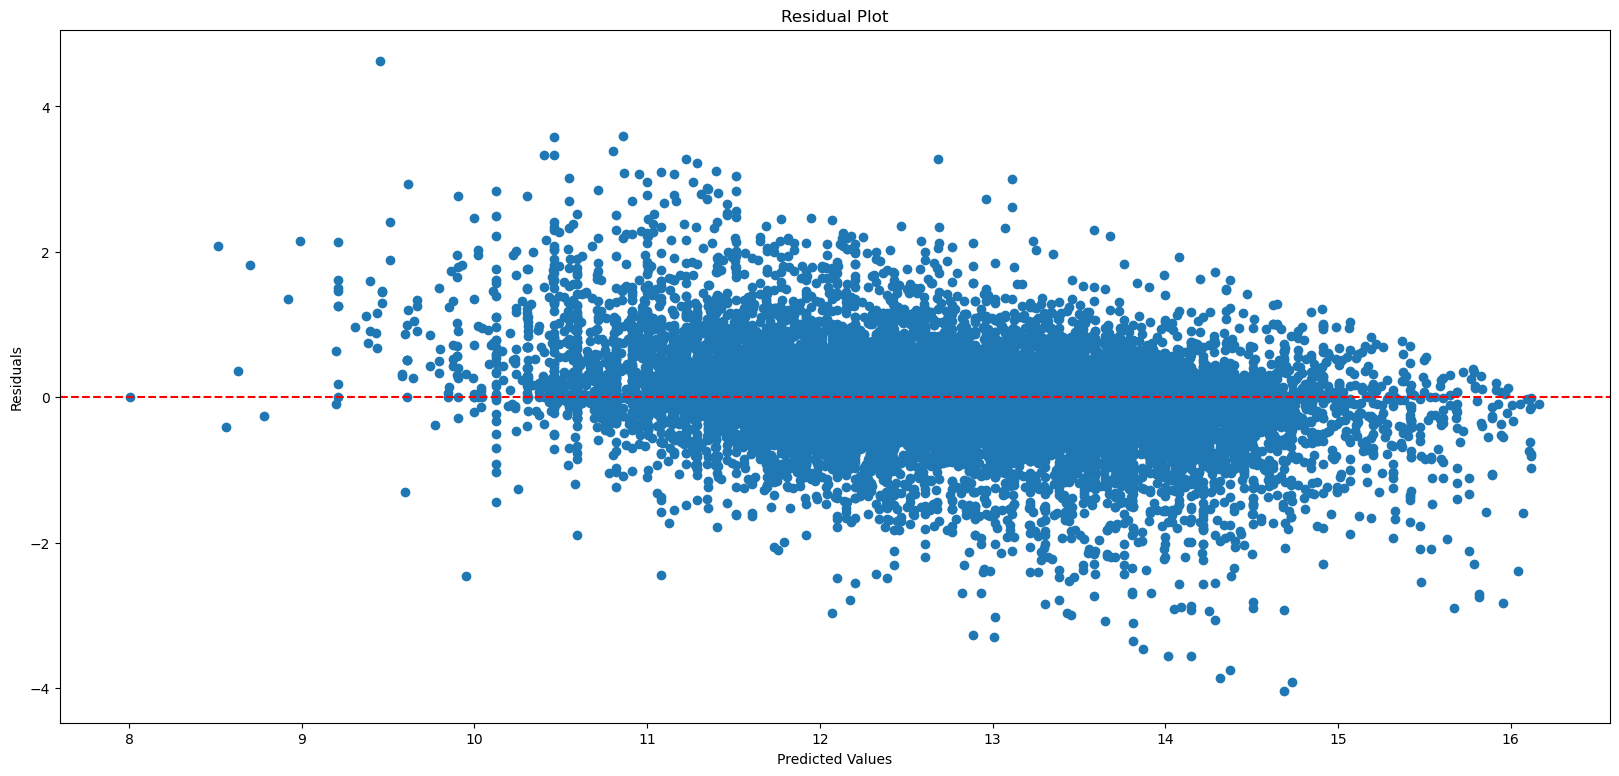

In [5]:
# график остатков на тестовой выборке
residuals = y_test - y_test_predict_dtr
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_dtr, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

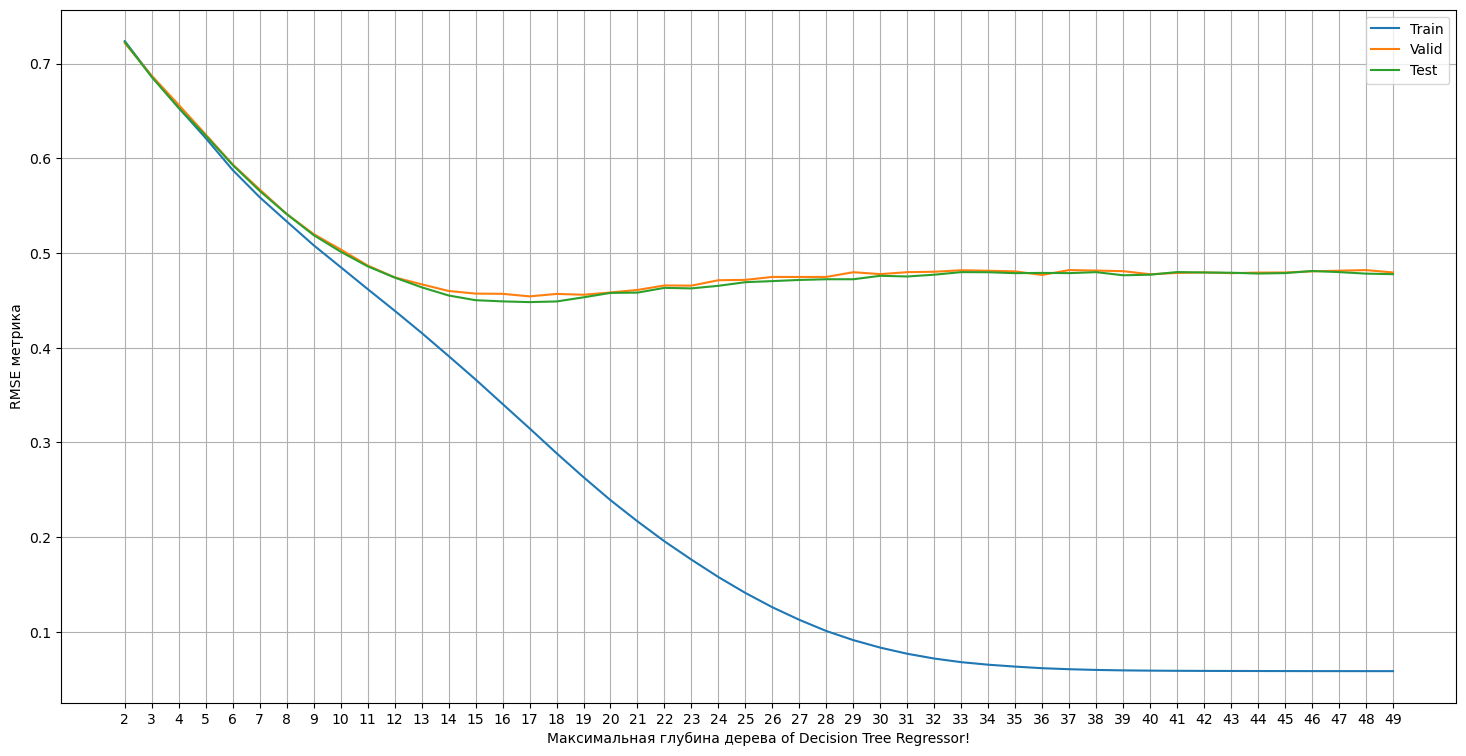

In [6]:
# формируем и выводим информацию о значении метрик в модели DecisionTreeRegression в зависимости от параметра max_depths (максимальная глубина дерева)
max_depths = range(2, 50)
train_scores = []
valid_scores = []
test_scores = []
for max_depth in max_depths:
    model_dtr = DecisionTreeRegressor(max_depth=max_depth)
    model_dtr.fit(X_train, y_train)
    y_train_pred = model_dtr.predict(X_train)
    y_valid_pred = model_dtr.predict(X_valid)
    y_test_pred = model_dtr.predict(X_test)
    train_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    valid_scores.append(np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
    test_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
fig, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(x=max_depths, y=train_scores, label="Train")
sns.lineplot(x=max_depths, y=valid_scores, label="Valid")
sns.lineplot(x=max_depths, y=test_scores, label="Test")
ax.set_xlabel("Максимальная глубина дерева of Decision Tree Regressor!")
ax.set_ylabel("RMSE метрика")
ax.set_xticks(max_depths)
ax.grid()

In [7]:
# cохраняем модель в файл
dump(model_dtr, "model/model_DecisionTreeRegressor.joblib")

['model/model_DecisionTreeRegressor.joblib']

#### Optimization model - **OPTUNA** - Подбор гиперпараметров

In [8]:
%%time
# фломируем модель optuna для подбора гиперпараметров
def optuna_objective(trial):
    # задаем диапазон значений гиперпараметров
    param = {
        # "criterion": trial.suggest_categorical("criterion", ["squared_error", "friedman_mse", "poisson"]),
        # "splitter": trial.suggest_categorical("splitter", ["best", "random"]),
        "max_depth": trial.suggest_int("max_depth", 2, 1000),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 100),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 100),
        # "min_weight_fraction_leaf": trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5, step=0.01),
        # "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        # "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 100),
        # "min_impurity_decrease": trial.suggest_float("min_impurity_decrease", 0.1, 0.9, step=0.01),
        # "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 1.0, step=0.01)
    }

    # инициализируем и обучаем модель
    optuna_dtr = DecisionTreeRegressor(**param,
                                       random_state=RANDOM_SEED
                                       )
    optuna_dtr.fit(X_train, y_train)

    # делаем предсказания на валидационных данных
    y_pred = optuna_dtr.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    # сообщаем оптимизатору текущий результат
    #trial.report(mse, optuna_rfr.best_iteration)

    # проверяем, следует ли обрезать пробу
    #if trial.should_prune():
    #    raise optuna.exceptions.TrialPruned()

    return mae

# создаем и оптимизируем исследование с MedianPruner
study = optuna.create_study(direction="minimize", pruner=optuna.pruners.MedianPruner)
study.optimize(optuna_objective, n_trials=500, show_progress_bar=True)

# выводим лучшие параметры
optuna_params = study.best_trial.params
print(f"Лучшие параметры: {optuna_params}")

  0%|          | 0/500 [00:00<?, ?it/s]

Лучшие параметры: {'max_depth': 585, 'min_samples_split': 12, 'min_samples_leaf': 1}
CPU times: user 2h 21min 5s, sys: 52.9 s, total: 2h 21min 58s
Wall time: 2h 23min 56s


In [9]:
%%time
# инициализируем и обучаем модель
model_dtr_optuna = DecisionTreeRegressor(**optuna_params,
                                       random_state=RANDOM_SEED)
model_dtr_optuna.fit(X_train, y_train)
y_train_predict_dtr_optuna = model_dtr_optuna.predict(X_train)
y_valid_predict_dtr_optuna = model_dtr_optuna.predict(X_valid)
y_test_predict_dtr_optuna = model_dtr_optuna.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_dtr_optuna))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_dtr_optuna)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_dtr_optuna)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_dtr_optuna))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_dtr_optuna)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_dtr_optuna)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_dtr_optuna))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_dtr_optuna)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_dtr_optuna)*100))
print()


Тренировочная выборка:
     RMSE: 0.19
     MAE: 0.11
     MAPE: 0.87%
Валидационная выборка:
     RMSE: 0.45
     MAE: 0.27
     MAPE: 2.17%
Тестовая выборка:
     RMSE: 0.45
     MAE: 0.27
     MAPE: 2.18%

CPU times: user 19.4 s, sys: 164 ms, total: 19.6 s
Wall time: 19.9 s


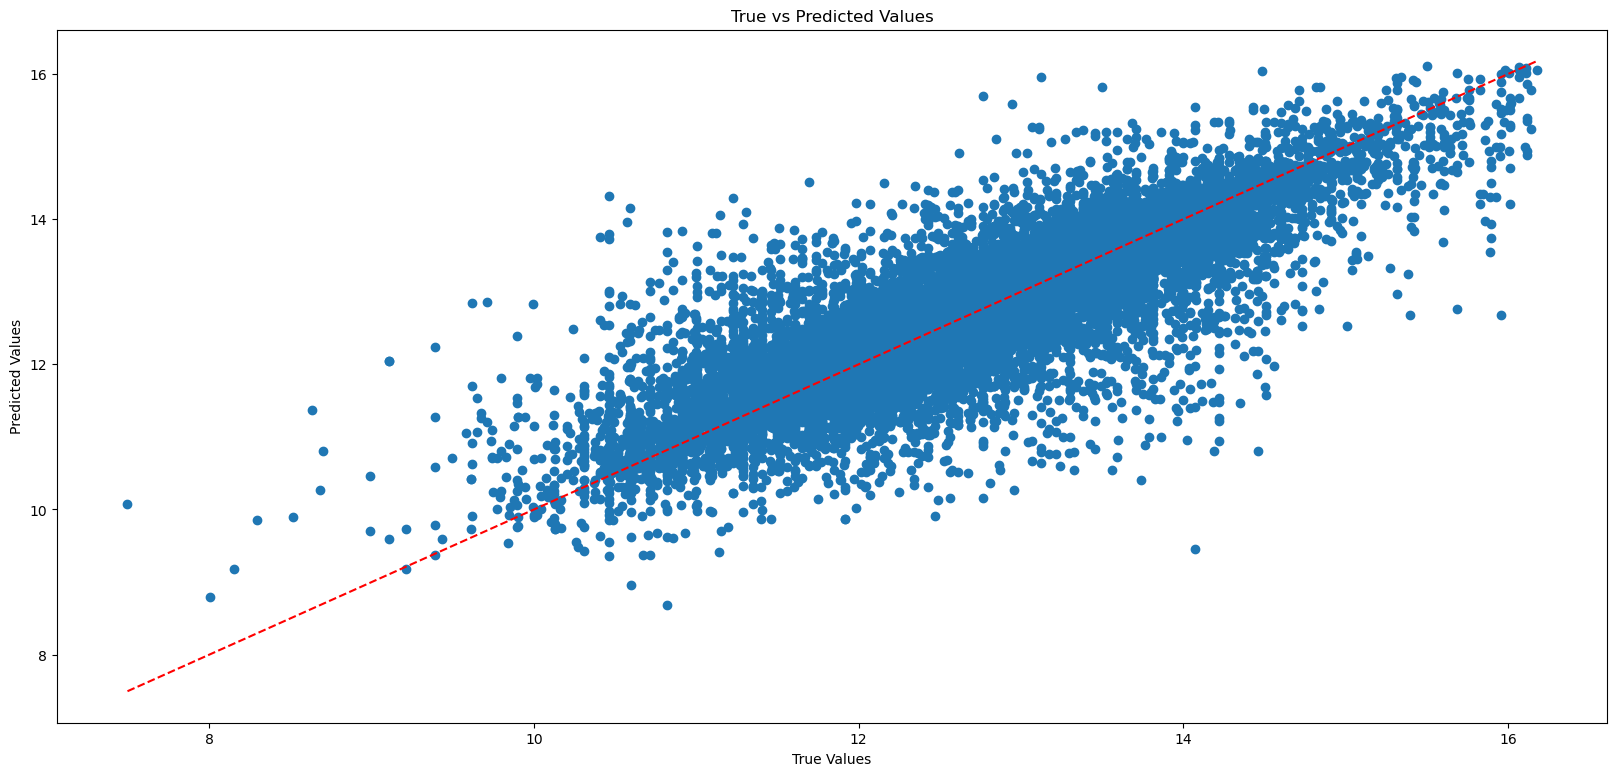

In [10]:
# график предсказанных значений против истинных значений для тестовой выборки
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_dtr_optuna)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

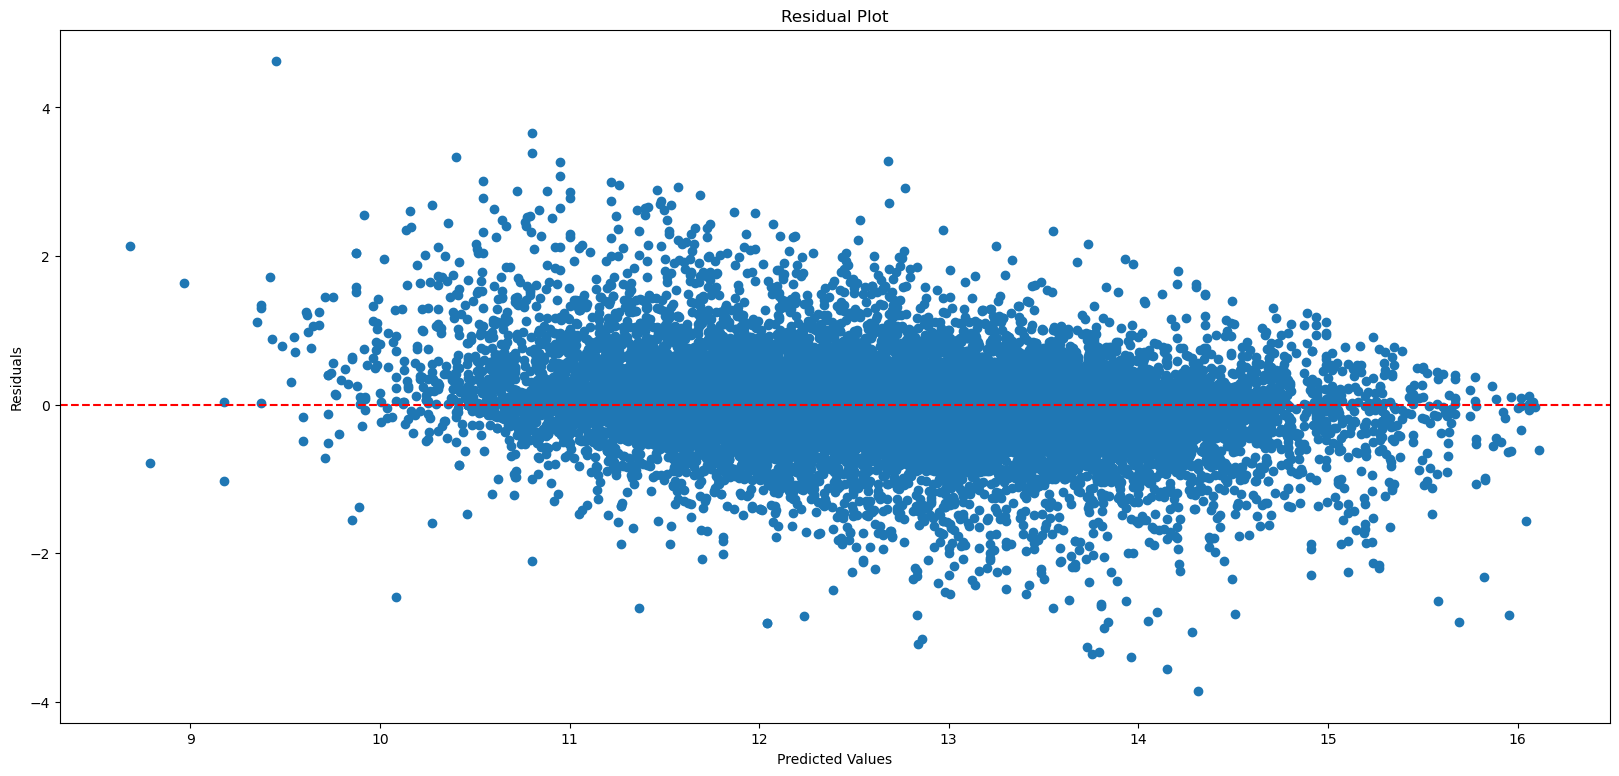

In [11]:
# график остатков для тестовой выборки
residuals = y_test - y_test_predict_dtr_optuna
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_dtr_optuna, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [12]:
# формируем и выводим график истории оптимизации
optuna.visualization.plot_optimization_history(study, target_name="mae")

In [13]:
# формируем и выводим график важности гиперпараметров
optuna.visualization.plot_param_importances(study, target_name="mae")

In [14]:
# визуализация контуров гиперпараметров
optuna.visualization.plot_contour(study, params=["min_samples_leaf", "max_depth"], target_name="mae")

In [15]:
# визуализация среза
optuna.visualization.plot_slice(study, target_name="mae")

In [16]:
# # визуализация промежуточных значений (полезна, если вы используете промежуточные значения во время оптимизации)
# optuna.visualization.plot_intermediate_values(study)

In [17]:
# визуализация прогресса оптимизации для параллельной координатной плоскости
optuna.visualization.plot_parallel_coordinate(study, target_name="mae")

In [18]:
# визуализация соотношения гиперпараметров к целевой метрике
optuna.visualization.plot_edf(study, target_name="mae")

In [19]:
# cохраняем модель в файл
dump(model_dtr_optuna, "model/model_DecisionTreeRegressorOptuna.joblib")

['model/model_DecisionTreeRegressorOptuna.joblib']

#### Optimization model - **Hyperopt** - Подбор гиперпараметров

In [20]:
%%time
# определение пространства поиска гиперпараметров
space = {
    # "criterion": hp.choice("criterion", ["squared_error", "friedman_mse", "poisson"]),
    # "splitter": hp.choice("splitter", ["best", "random"]),
    "max_depth": hp.randint("max_depth", 2, 501),  # верхняя граница исключается, поэтому добавляем 1
    "min_samples_split": hp.randint("min_samples_split", 2, 101),
    "min_samples_leaf": hp.randint("min_samples_leaf", 1, 101),
    # "min_weight_fraction_leaf": hp.uniform("min_weight_fraction_leaf", 0.0, 0.5),
    # "max_features": hp.choice("max_features", ["sqrt", "log2", None]),
    # "max_leaf_nodes": hp.randint("max_leaf_nodes", 2, 101),
    # "min_impurity_decrease": hp.uniform("min_impurity_decrease", 0.1, 0.9),
    # "ccp_alpha": hp.uniform("ccp_alpha", 0.0, 1.0)
}

# определение целевой функции
def hyperopt_objective(params):
    # инициализация и обучение модели
    reg = DecisionTreeRegressor(**params, random_state=RANDOM_SEED)
    reg.fit(X_train, y_train)

    # предсказание и расчет ошибки
    y_pred = reg.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    # возврат значения потерь и статуса
    return {"loss": mae, "status": STATUS_OK}

# запуск оптимизатора
trials = Trials()
best = fmin(fn=hyperopt_objective,
            space=space,
            algo=tpe.suggest,
            max_evals=400,
            trials=trials)

# Вывод лучших параметров
hyperopt_params = space_eval(space, best)
print(f"Лучшие параметры: {hyperopt_params}")

100%|██████████| 400/400 [1:35:21<00:00, 14.30s/trial, best loss: 0.27479231066705034]
Лучшие параметры: {'max_depth': 318, 'min_samples_leaf': 1, 'min_samples_split': 16}
CPU times: user 1h 33min 26s, sys: 37 s, total: 1h 34min 3s
Wall time: 1h 35min 21s


In [21]:
%%time
# продолжим подбор параметров, увеличиваем max_evals(должен быть строго больше, чем на предыдуших итерациях) и используем старый trials
best_best=fmin(hyperopt_objective, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=500, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(RANDOM_SEED) # фиксируем для повторяемости результата
         )

hyperopt_params_best = space_eval(space, best_best)


print("Наилучшие значения гиперпараметров {}".format(hyperopt_params_best))

100%|██████████| 500/500 [24:53<00:00, 14.93s/trial, best loss: 0.2742366275000957] 
Наилучшие значения гиперпараметров {'max_depth': 387, 'min_samples_leaf': 6, 'min_samples_split': 6}
CPU times: user 24min 22s, sys: 9.49 s, total: 24min 32s
Wall time: 24min 53s


In [22]:
%%time
# инициализация и обучение модели с исправленными параметрами
model_dtr_hyperopt = DecisionTreeRegressor(**hyperopt_params, random_state=RANDOM_SEED)
model_dtr_hyperopt.fit(X_train, y_train)


# инициализируем и обучаем модель
model_dtr_hyperopt = DecisionTreeRegressor(**hyperopt_params_best,
                                       random_state=RANDOM_SEED)
model_dtr_hyperopt.fit(X_train, y_train)
y_train_predict_dtr_hyperopt = model_dtr_hyperopt.predict(X_train)
y_valid_predict_dtr_hyperopt = model_dtr_hyperopt.predict(X_valid)
y_test_predict_dtr_hyperopt = model_dtr_hyperopt.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_dtr_hyperopt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_dtr_hyperopt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_dtr_hyperopt)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_dtr_hyperopt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_dtr_hyperopt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_dtr_hyperopt)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_dtr_hyperopt))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_dtr_hyperopt)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_dtr_hyperopt)*100))
print()


Тренировочная выборка:
     RMSE: 0.25
     MAE: 0.16
     MAPE: 1.24%
Валидационная выборка:
     RMSE: 0.44
     MAE: 0.27
     MAPE: 2.17%
Тестовая выборка:
     RMSE: 0.43
     MAE: 0.27
     MAPE: 2.17%

CPU times: user 36.3 s, sys: 266 ms, total: 36.5 s
Wall time: 37 s


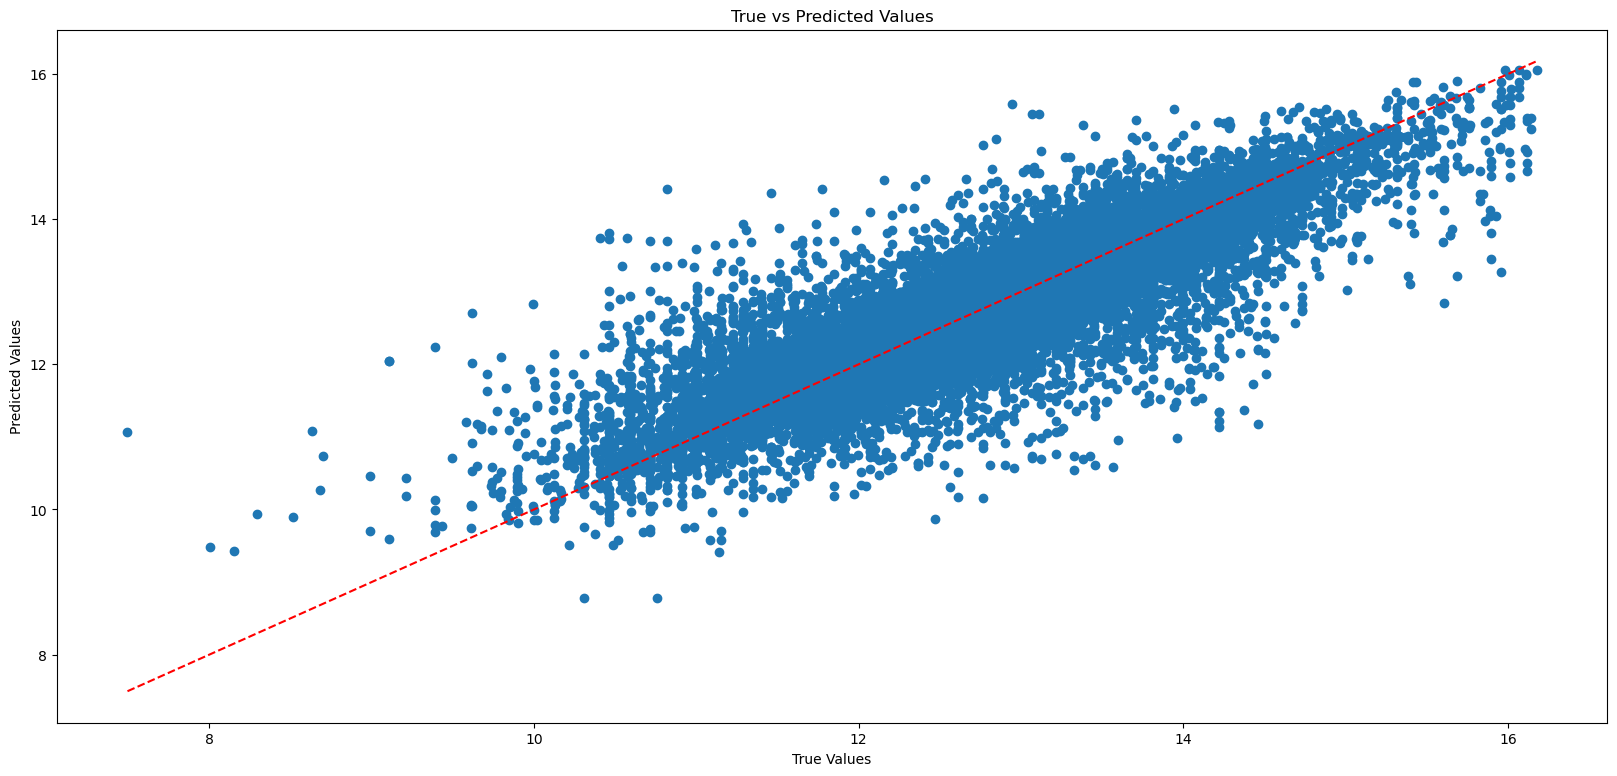

In [23]:
# график предсказанных значений против истинных значений для тестовой выборки
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_dtr_hyperopt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

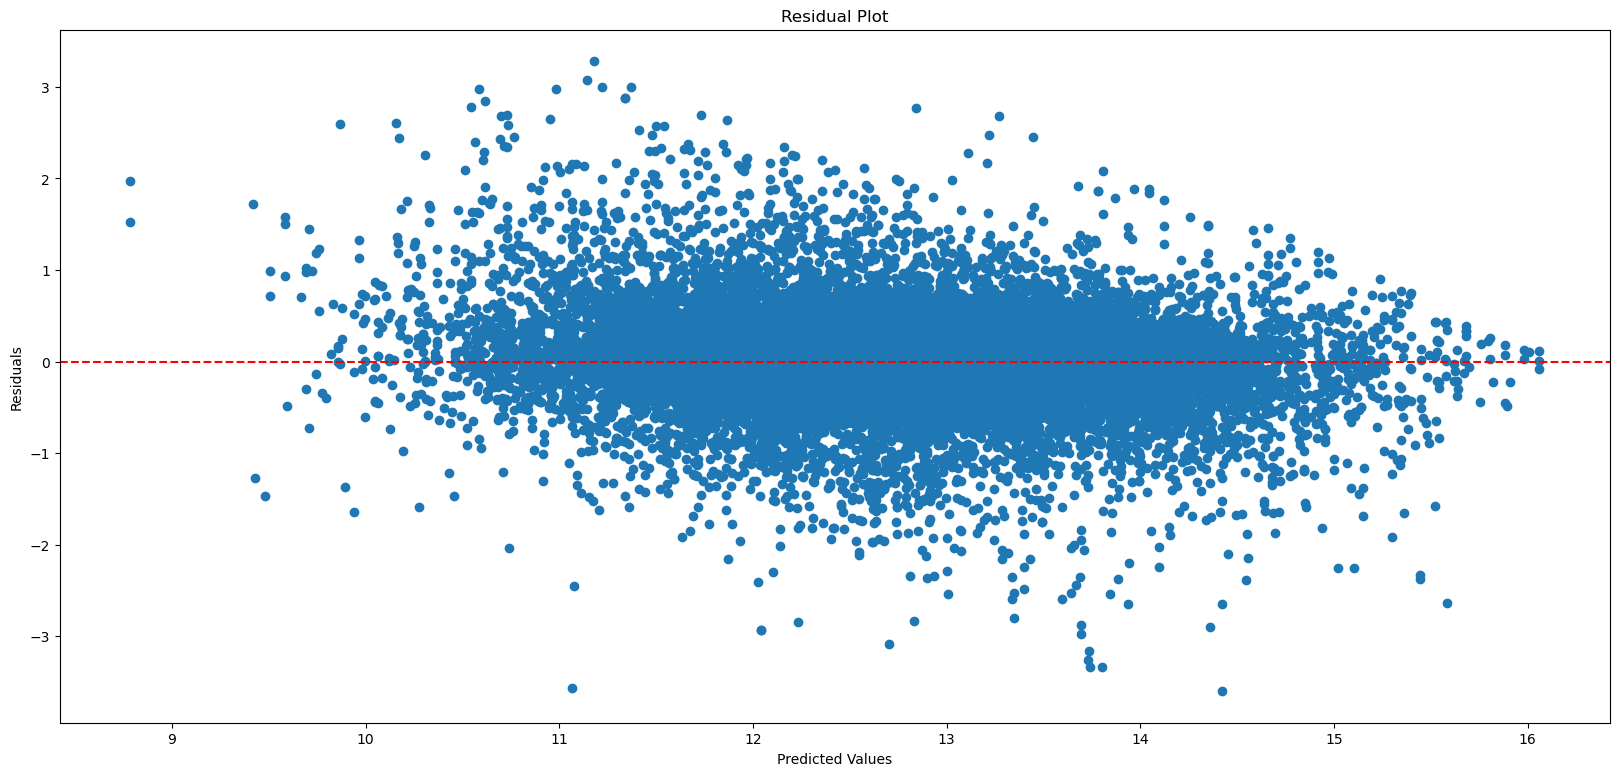

In [24]:
# график остатков для тестовой выборки
residuals = y_test - y_test_predict_dtr_hyperopt
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_dtr_hyperopt, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

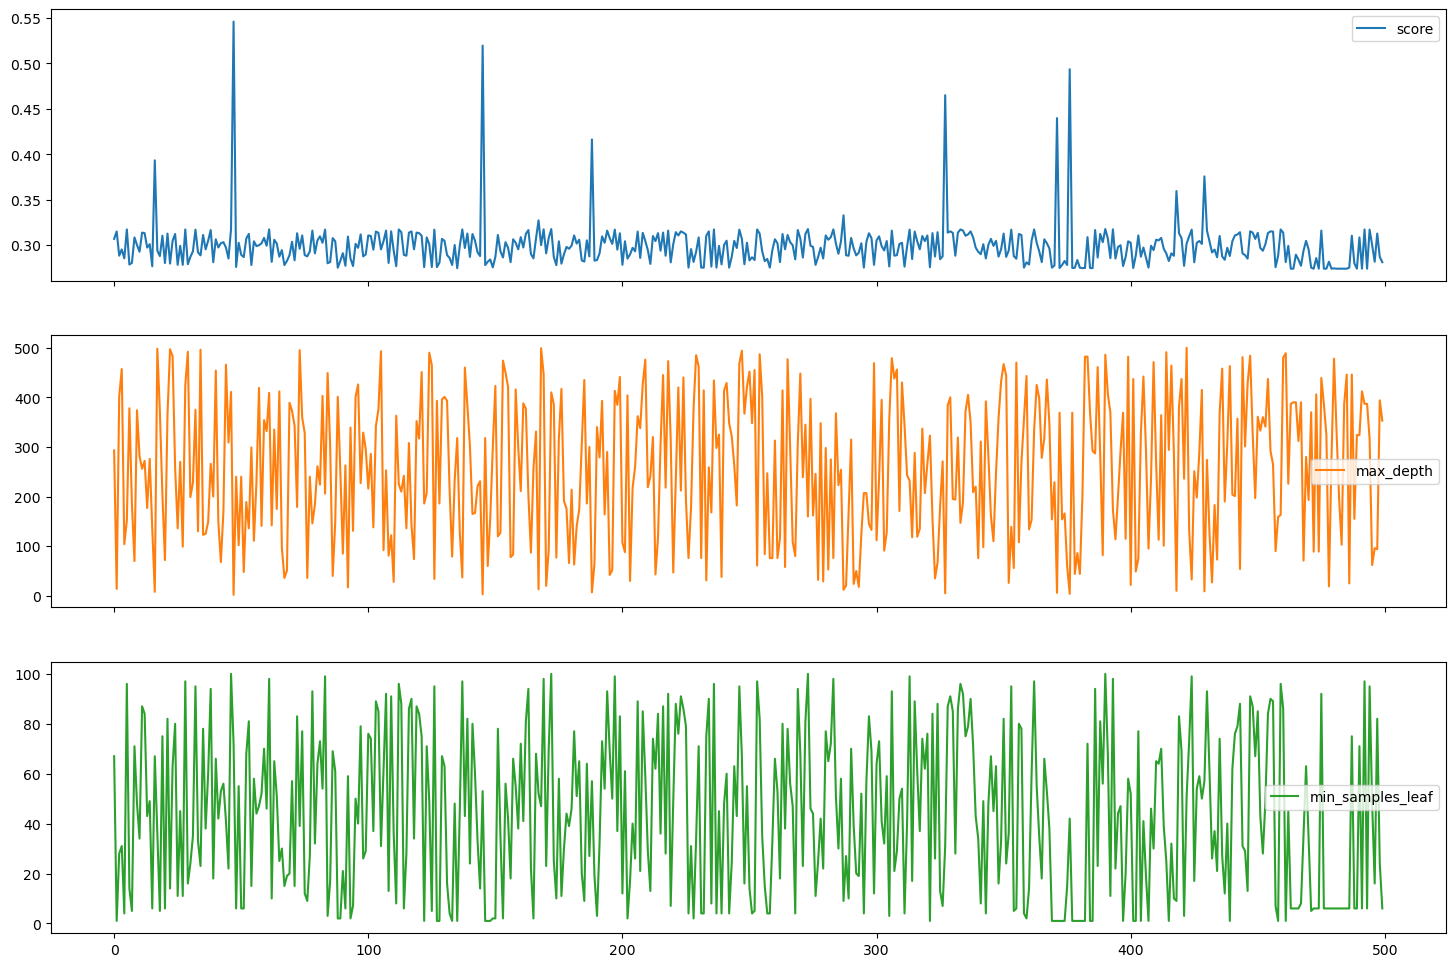

In [25]:
# формируем и выводим график, как менялась точность при различных гиперпараметрах
tpe_results=np.array([[x["result"]["loss"],
                      x["misc"]["vals"]["max_depth"][0],
                      x["misc"]["vals"]["min_samples_leaf"][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=["score", "max_depth", "min_samples_leaf"])
# тепловая карта в данном случае не наглядна, применяем линейный график
tpe_results_df.plot(subplots=True,figsize=(18, 12))

In [26]:
# cохраняем модель в файл
dump(model_dtr_hyperopt, "model/model_DecisionTreeRegressorHyperopt.joblib")

['model/model_DecisionTreeRegressorHyperopt.joblib']

#### Optimization model - **GridSearchCV and RandomizedSeachCV** - Подбор гиперпараметров

In [27]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
import numpy as np

# определяем пространство гиперпараметров
param_grid = {
    # "criterion": ["squared_error", "friedman_mse", "poisson"],
    # "splitter": ["best", "random"],
    "max_depth": range(2, 21),  # Python ranges exclude the last number
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    # "min_weight_fraction_leaf": [0.0 + i * 0.01 for i in range(51)],
    # "max_features": ["sqrt", "log2", None],
    # "max_leaf_nodes": range(2, 101),
    # "min_impurity_decrease": [0.1 + i * 0.01 for i in range(81)],
    # "ccp_alpha": [0.0 + i * 0.01 for i in range(101)]
}

# инициализация DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)

# так как GridSearchCV не поддерживает прогресс бар напрямую, мы можем создать свою функцию
class TqdmGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        """ Переопределение этого метода добавляет поддержку прогресс бара для поиска """
        candidate_params = list(ParameterGrid(self.param_grid))
        with tqdm(total=len(candidate_params)) as pbar:
            for parameters in candidate_params:
                evaluate_candidates([parameters])
                pbar.update(1)

# теперь используем наш класс вместо стандартного GridSearchCV
grid_search = TqdmGridSearchCV(dtr, param_grid, scoring="neg_mean_absolute_error", cv=5)
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
print(f"Лучшие параметры (GridSearchCV): {grid_best_params}")

100%|██████████| 1710/1710 [25:07:10<00:00, 52.88s/it]   


Лучшие параметры (GridSearchCV): {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CPU times: user 1d 9min 44s, sys: 25min 44s, total: 1d 35min 29s
Wall time: 1d 1h 7min 46s


In [28]:
%%time
# определяем пространство гиперпараметров
param_grid = {
    # "criterion": ["squared_error", "friedman_mse", "poisson"],
    # "splitter": ["best", "random"],
    "max_depth": range(2, 30),  # Python ranges exclude the last number
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    # "min_weight_fraction_leaf": [0.0 + i * 0.01 for i in range(51)],
    # "max_features": ["sqrt", "log2", None],
    # "max_leaf_nodes": range(2, 101),
    # "min_impurity_decrease": [0.1 + i * 0.01 for i in range(81)],
    # "ccp_alpha": [0.0 + i * 0.01 for i in range(101)]
}

# инициализация DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)

# так как GridSearchCV не поддерживает прогресс бар напрямую, мы можем создать свою функцию
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def __init__(self, estimator, param_distributions, n_iter=10, **kwargs):
        super().__init__(estimator, param_distributions, n_iter=n_iter, **kwargs)
        self.param_grid = param_distributions

    def _run_search(self, evaluate_candidates):
        candidate_params = list(ParameterGrid(self.param_grid))
        with tqdm(total=len(candidate_params)) as pbar:
            for parameters in candidate_params:
                evaluate_candidates([parameters])
                pbar.update(1)
                
# для RandomizedSearchCV можно использовать параметр verbose для отображения прогресса
random_search = TqdmRandomizedSearchCV(dtr, param_grid, n_iter=500, scoring="neg_mean_absolute_error", cv=5)
random_search.fit(X_train, y_train)
random_best_params = random_search.best_params_
print(f"Лучшие параметры (RandomizedSearchCV): {random_best_params}")

100%|██████████| 2520/2520 [45:52:08<00:00, 65.53s/it]     


Лучшие параметры (RandomizedSearchCV): {'max_depth': 28, 'min_samples_leaf': 6, 'min_samples_split': 2}
CPU times: user 1d 18h 31min 51s, sys: 42min 29s, total: 1d 19h 14min 20s
Wall time: 1d 21h 52min 26s



Тренировочная выборка:
     RMSE: 0.25
     MAE: 0.16
     MAPE: 1.26%
Валидационная выборка:
     RMSE: 0.44
     MAE: 0.27
     MAPE: 2.18%
Тестовая выборка:
     RMSE: 0.43
     MAE: 0.27
     MAPE: 2.17%



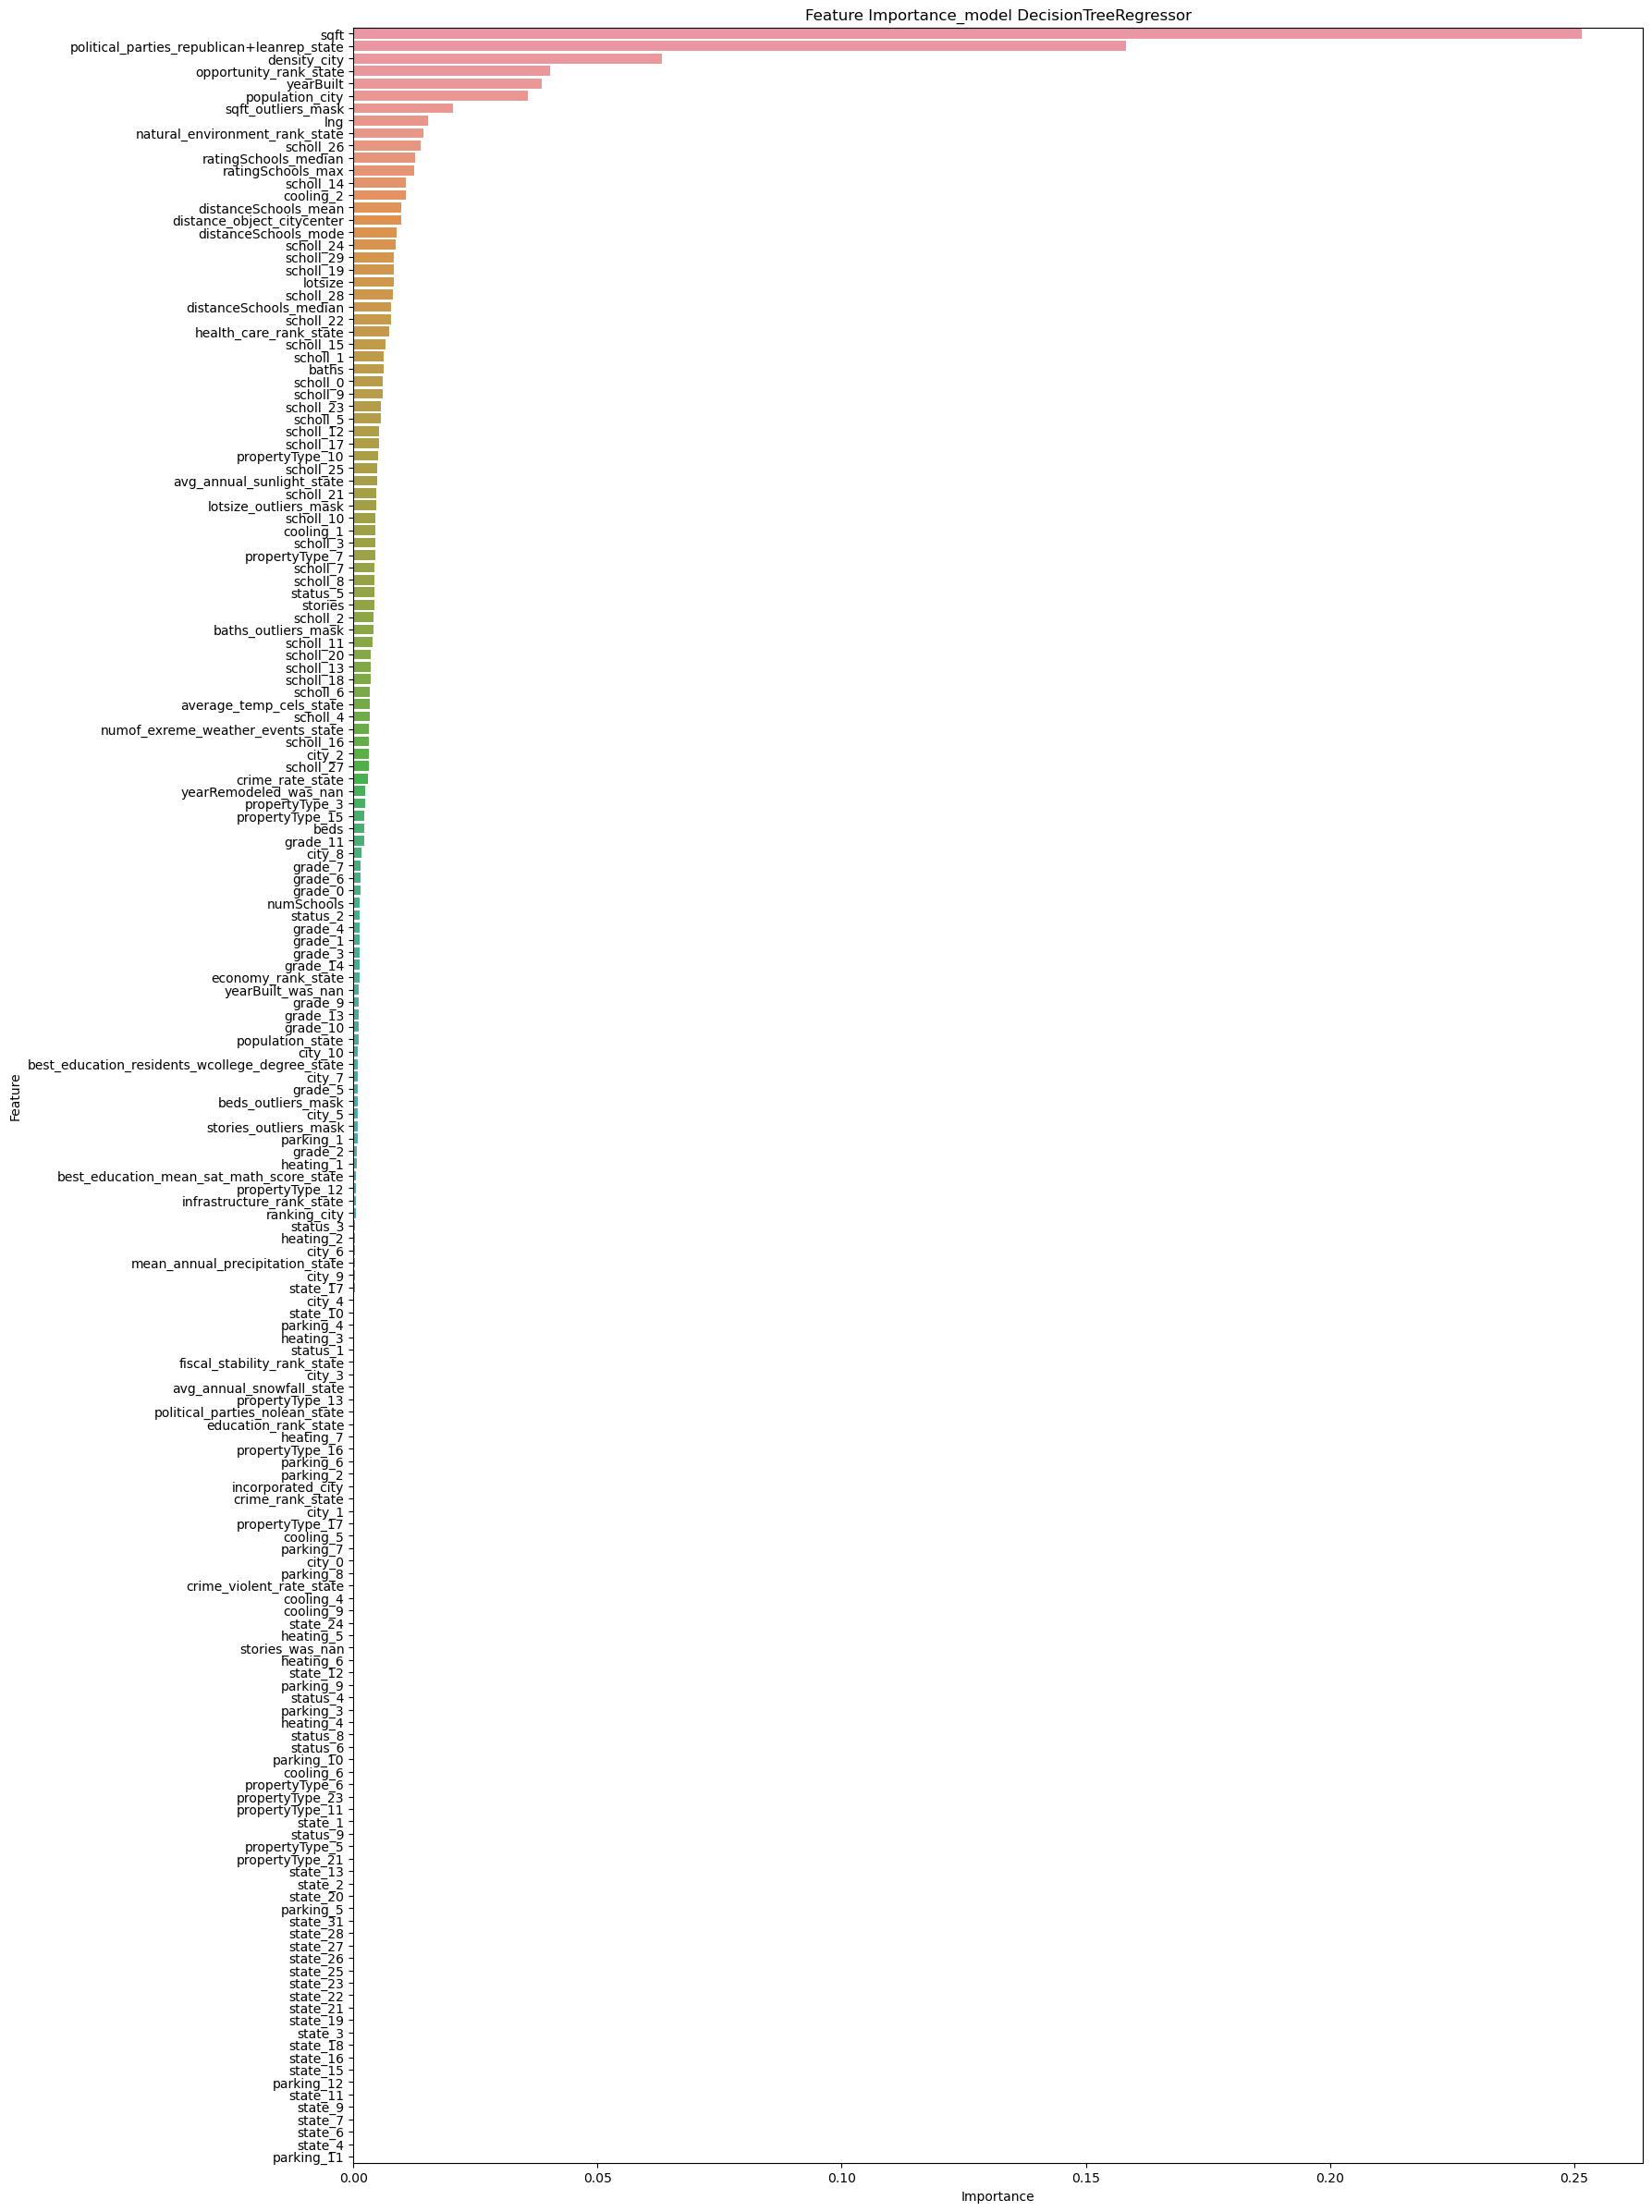

CPU times: user 26.5 s, sys: 1.77 s, total: 28.2 s
Wall time: 28.8 s


In [38]:
%%time
# загружаем данный
data_dtr = pd.read_csv("data/data_final.csv", sep=",")

# создаем матрицу наблюдений и вектор правильных ответов
X = data_dtr.drop(columns="target", axis=1)
y = data_dtr["target"]

# производим разделение выборки на тренировочную, валидационную и тестовую
X_train, X_validtest, y_train, y_validtest = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_validtest, y_validtest, test_size=0.5, random_state=RANDOM_SEED)

# #производим отбор наиболее важных признаков
# selector = SelectKBest(score_func=f_regression, k=100)
# selector.fit(X_train, y_train)
# best_features = selector.get_feature_names_out()
# X_train = X_train[best_features]
# X_valid = X_valid[best_features]
# X_test = X_test[best_features]

# формируем лист признаков для графика
feature_names = X_train.columns

# производим нормализацию данных
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# строим и обучаем модель
model_dtr_rscv= DecisionTreeRegressor(max_depth=28, 
                                  min_samples_leaf=6, 
                                  min_samples_split=2,
                                  #criterion="squared_error", # по умолчанию squared_error и осторожно с absolute_error - очень долго считает
                                  #splitter="best", # по умолчанию best
                                  #max_features=None, # по умолчанию None
                                  #min_weight_fraction_leaf=0.00001, # по умолчанию 0
                                  #min_impurity_decrease=0.00000001, # по умолчанию 0
                                  #ccp_alpha=0.00000001, # по умолчанию 0
                                  random_state=RANDOM_SEED)

# обучаем модель
model_dtr_rscv.fit(X_train, y_train)
# формируем предсказания
y_train_predict_dtr_rscv = model_dtr_rscv.predict(X_train)
y_valid_predict_dtr_rscv = model_dtr_rscv.predict(X_valid)
y_test_predict_dtr_rscv = model_dtr_rscv.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_predict_dtr_rscv))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_train, y_train_predict_dtr_rscv)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_train, y_train_predict_dtr_rscv)*100))
print("Валидационная выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_dtr_rscv))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_valid, y_valid_predict_dtr_rscv)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_valid, y_valid_predict_dtr_rscv)*100))
print("Тестовая выборка:")
print("     RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict_dtr_rscv))))
print("     MAE: {:.2f}".format(mean_absolute_error(y_test, y_test_predict_dtr_rscv)))
print("     MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, y_test_predict_dtr_rscv)*100))
print()

# выводим график важности признаков
feature_importance = model_dtr_rscv.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(18, 30))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance_model DecisionTreeRegressor")
plt.show()

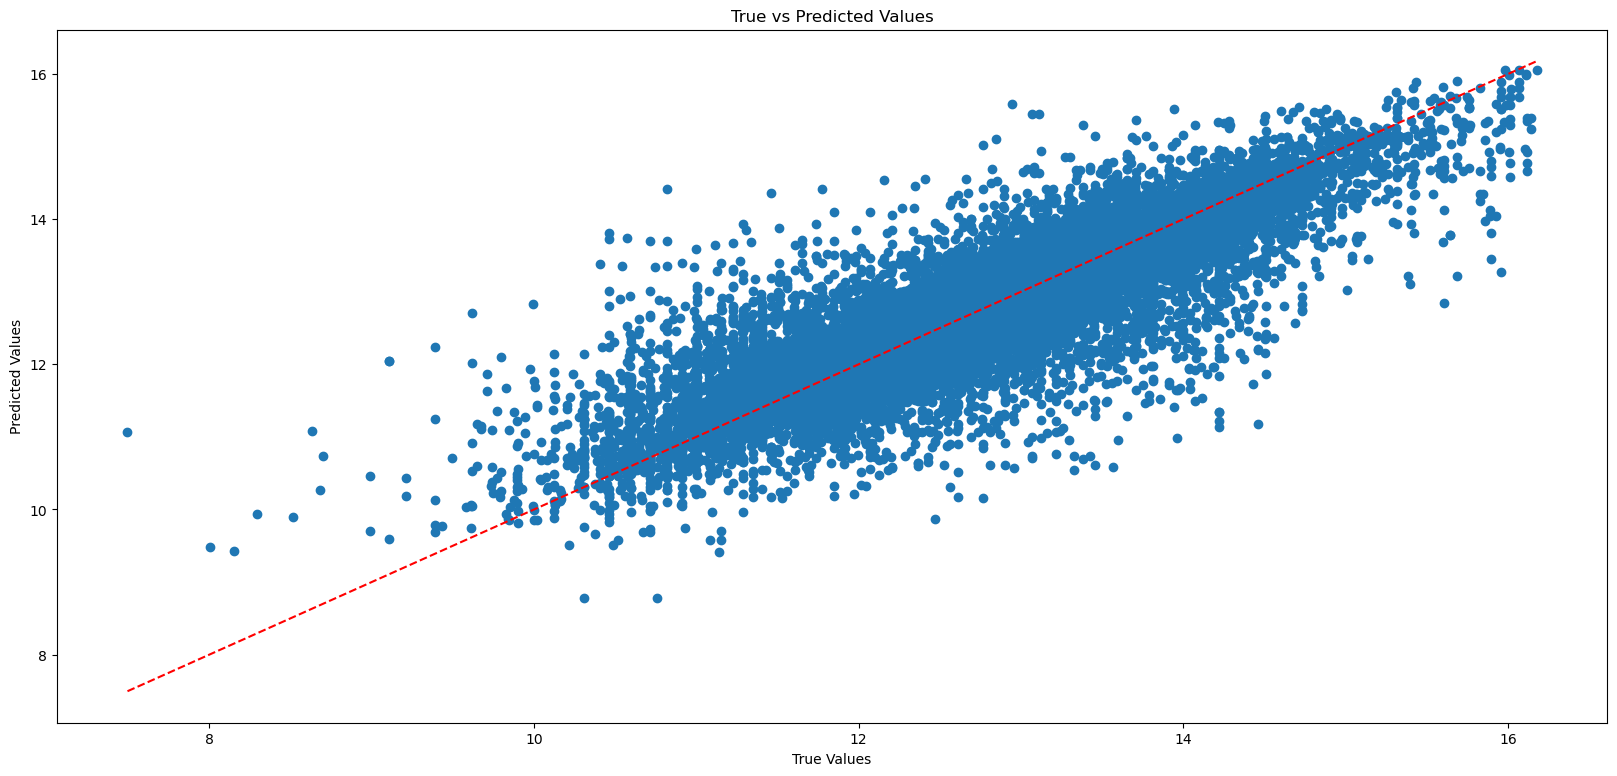

In [39]:
# график предсказанных значений против истинных значений для тестовой выборки
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_dtr_rscv)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

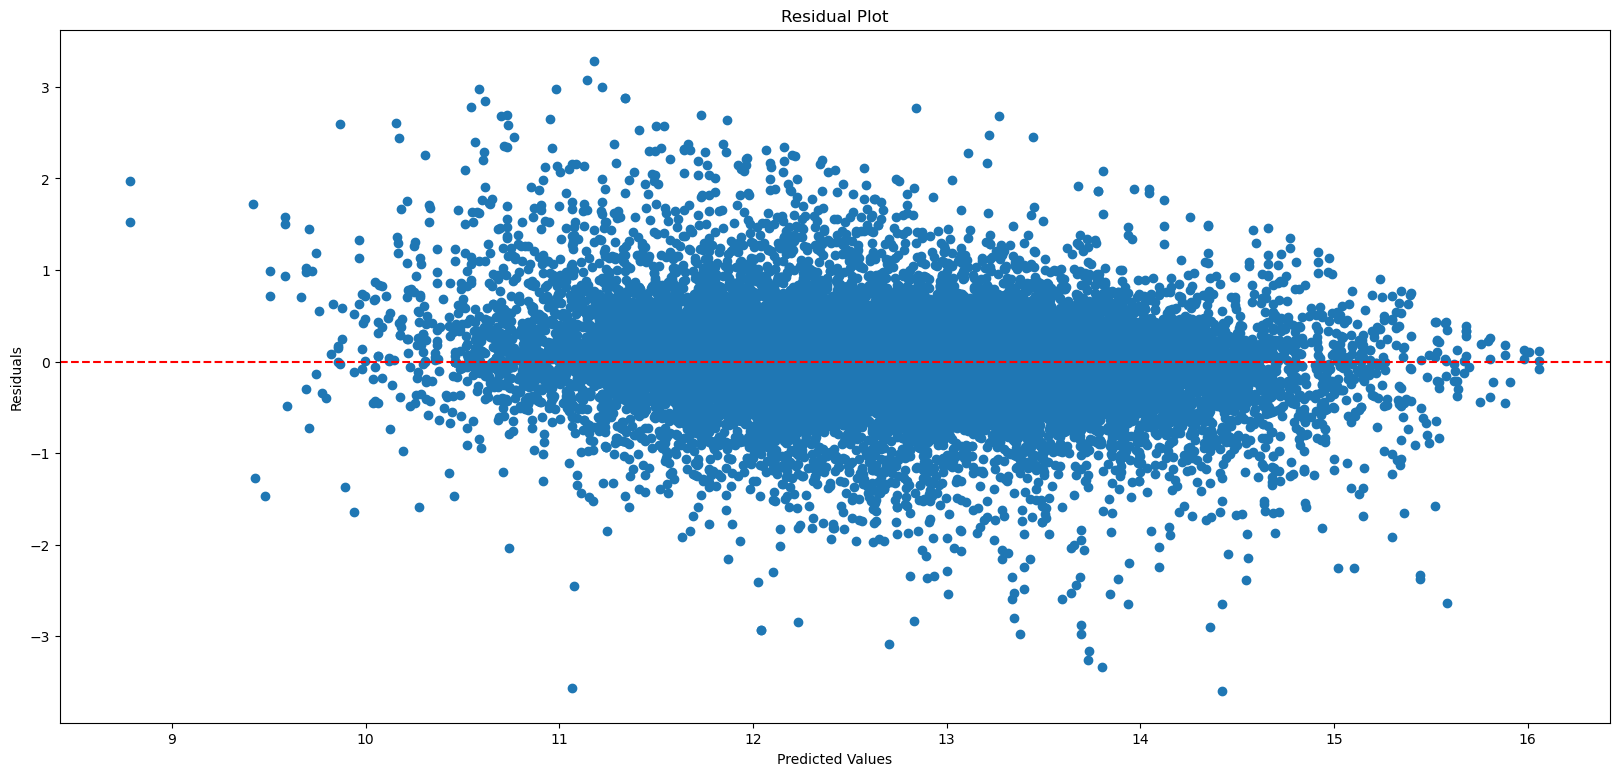

In [40]:
# график остатков для тестовой выборки
residuals = y_test - y_test_predict_dtr_rscv
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_dtr_rscv, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [41]:
# cохраняем модель в файл
dump(model_dtr_rscv, "model/model_DecisionTreeRegressorGridRandomizedSCV.joblib")

['model/model_DecisionTreeRegressorGridRandomizedSCV.joblib']

In [42]:
# в данную переменную буду сохранять результаты моделей [RSME, MAE, MAPE и название алгоритма]
results = []

# описываем функцию для оценки модели, а также для сохранения значений метрик и последующего использования
def results_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_name, results):
  """Функция для вывода результатов score для train, valid и test, а также для сохранения этих значений для последующего использования.
    
  Аргументы:
    model (model): обученная модель, которую необходимо оценить;
    model_name (string): название используемой модели.
  """
  model_result = []
  # предсказания и оценка для тренировочных данных
  y_train = np.expm1(y_train)
  y_train_pred = np.expm1(model.predict(X_train))
  RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round(3)
  MAE_train = mean_absolute_error(y_train, y_train_pred).round(3)
  MAPE_train = (mean_absolute_percentage_error(y_train, y_train_pred) * 100).round(3)
  # вывод результатов для тренировочных данных
  # print(f"Тренировочная выборка:")
  # print(f"    RMSE: {RMSE_train:.3f}")
  # print(f"    MAE: {MAE_train:.3f}")
  # print(f"    MAPE: {MAPE_train:.2f}%")
  
  # предсказания и оценка для валидационных данных
  y_valid = np.expm1(y_valid)
  y_valid_pred = np.expm1(model.predict(X_valid))
  RMSE_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred)).round(3)
  MAE_valid = mean_absolute_error(y_valid, y_valid_pred).round(3)
  MAPE_valid = (mean_absolute_percentage_error(y_valid, y_valid_pred) * 100).round(3)
  # вывод результатов для валидационных данных
  # print(f"Валидная выборка:")
  # print(f"    RMSE: {RMSE_valid:.3f}")
  # print(f"    MAE: {MAE_valid:.3f}")
  # print(f"    MAPE: {MAPE_valid:.2f}%")
  
  # предсказания и оценка для тестовых данных
  y_test = np.expm1(y_test)
  y_test_pred = np.expm1(model.predict(X_test))
  RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round(3)
  MAE_test = mean_absolute_error(y_test, y_test_pred).round(3)
  MAPE_test = (mean_absolute_percentage_error(y_test, y_test_pred) * 100).round(3)
  # вывод результатов для тестовых данных
  # print(f"Тестовая выборка:")
  # print(f"    RMSE: {RMSE_test:.3f}")
  # print(f"    MAE: {MAE_test:.3f}")
  # print(f"    MAPE: {MAPE_test:.2f}%") 
  
  # сохранение результатов в список model_results
  results.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # сохранение результатов в список model_results
  model_result.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # создаем dataframe с результатами
  resultmodelScoreData = pd.DataFrame(model_result).set_index('ML_model').sort_values(by='MAPE_test', ascending=True)
  # выводим сводную информацию 
  display(resultmodelScoreData.sort_values(by="MAE_test", ascending=True).round(2))

In [44]:
# делаем предсказания на тренировочной, валидной и тестовой выборках и выводим результат
print("Модель DecisionTreeRegressor:")
results_model(model_dtr, X_train, y_train, X_valid, y_valid, X_test, y_test, "DecisionTreeRegressor", results)
print()
print("Модель DecisionTreeRegressorOptuna - c подбором гиперпараметров (библиотека Optuna):")
results_model(model_dtr_optuna, X_train, y_train, X_valid, y_valid, X_test, y_test, "DecisionTreeRegressorOptuna", results)
print()
print("Модель DecisionTreeRegressorHyperopt - c подбором гиперпараметров (библиотека Hyperopt):")
results_model(model_dtr_hyperopt, X_train, y_train, X_valid, y_valid, X_test, y_test, "DecisionTreeRegressorHyperopt", results)
print()
print("Модель DecisionTreeRegressorGridRandomizedSCV - c подбором гиперпараметров (библиотека Sklearn):")
results_model(model_dtr_rscv, X_train, y_train, X_valid, y_valid, X_test, y_test, "DecisionTreeRegressorGridRandomizedSCV", results)

Модель DecisionTreeRegressor:


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
DecisionTreeRegressor,131843.33,8965.16,0.62,433956.09,151509.11,35.2,423175.82,148675.44,34.16



Модель DecisionTreeRegressorOptuna - c подбором гиперпараметров (библиотека Optuna):


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
DecisionTreeRegressorOptuna,223172.92,63597.7,11.41,403682.14,148438.09,32.32,402218.21,146624.77,32.46



Модель DecisionTreeRegressorHyperopt - c подбором гиперпараметров (библиотека Hyperopt):


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
DecisionTreeRegressorHyperopt,270675.34,86788.48,16.33,393805.14,147400.66,31.06,384232.44,144702.29,31.42



Модель DecisionTreeRegressorGridRandomizedSCV - c подбором гиперпараметров (библиотека Sklearn):


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
DecisionTreeRegressorGridRandomizedSCV,270843.17,87426.73,16.61,393882.46,147525.05,31.07,383885.82,144752.7,31.4
